In [1]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the celestial object
ra = '13h12m19.74s'  # Right Ascension
dec = '1h39m0.17s'     # Declination
object_name = 'PAT 47'
sky_object = SkyCoord(ra, dec, frame='icrs')

In [3]:
# Define the observing location  (latitude, longitude, elevation)
observer_location = EarthLocation(lat=29.9264*u.deg, lon=31.8294*u.deg, height=500*u.m)

In [4]:
# Define the observing date
observing_date = Time('2024-04-18T20:30:00')  # replace with your observing date


In [5]:
# Define the range of Local Mean Time (LMT) for the whole day
delta_hours = np.linspace(0, 24, 100)*u.hour
lmt_range = observing_date + delta_hours


In [6]:
# Convert the celestial object's coordinates to the AltAz system for each hour of the day
altaz = sky_object.transform_to(AltAz(obstime=lmt_range, location=observer_location))


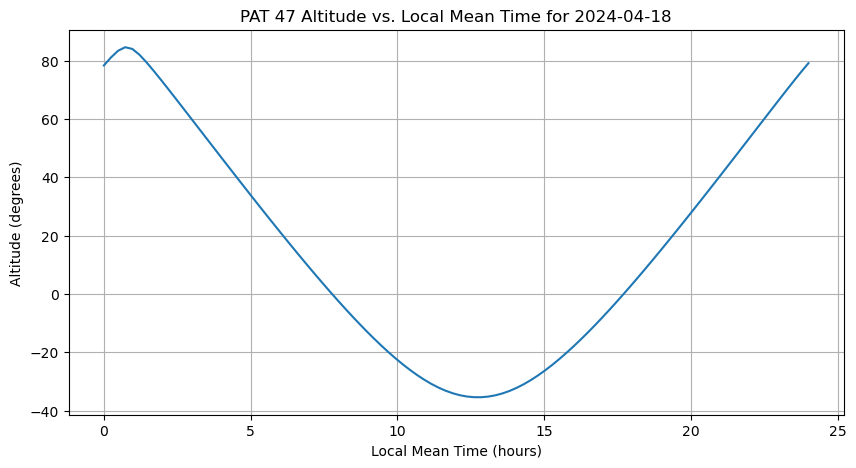

In [8]:
# Plot the altitude vs. LMT for the whole day
plt.figure(figsize=(10,5))
plt.plot(delta_hours, altaz.alt)
plt.title(f'{object_name} Altitude vs. Local Mean Time for {observing_date.to_value("iso", "date")}')
plt.xlabel('Local Mean Time (hours)')
plt.ylabel('Altitude (degrees)')
plt.grid(True)
plt.savefig('altitude_vs_local_mean_time.png')
plt.savefig('PAT 47.png')

plt.show()